# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Wrangle

In [2]:
df = pd.read_csv('employee_churn_data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Prepare

In [3]:
df.shape

(1470, 35)

In [4]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
for column in df.columns:
    
    print(column)
    print(df[f'{column}'].value_counts())
    print('')

Age
35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

DailyRate
691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5     

**Dropping non-informative columns**

EmployeeCount
EmployeeNumber
Over18
StandardHours - every value is 80

In [7]:
for column in df.columns:
    if column in ('EmployeeCount','EmployeeNumber','Over18','StandardHours'):
        df = df.drop(columns = f'{column}')

In [8]:
df.shape

(1470, 31)

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


**Changing catagorical values represented by numbers into string represintations based on the data dictionary for the data set**

Education

EnvironmentSatisfaction

JobInvolvement

JobSatisFaction

PerformanceRating

RelationshipSatisfaction

WorkLifeBalance

**Has ambiguas values replacing with strings of numbers for now**

JobLevel

StockOptionLevel

In [11]:
df.Education = df.Education.apply(lambda number : str(number).replace('1','no_college'))
df.Education = df.Education.apply(lambda number : str(number).replace('2','some_college'))
df.Education = df.Education.apply(lambda number : str(number).replace('3','bachelors_degree'))
df.Education = df.Education.apply(lambda number : str(number).replace('4','masters_degree'))
df.Education = df.Education.apply(lambda number : str(number).replace('5','Doctorate'))

In [12]:
df.Education.value_counts()

bachelors_degree    572
masters_degree      398
some_college        282
no_college          170
Doctorate            48
Name: Education, dtype: int64

In [13]:
df.EnvironmentSatisfaction = df.EnvironmentSatisfaction.apply(lambda number : str(number).replace('1','low'))
df.EnvironmentSatisfaction = df.EnvironmentSatisfaction.apply(lambda number : str(number).replace('2','meduim'))
df.EnvironmentSatisfaction = df.EnvironmentSatisfaction.apply(lambda number : str(number).replace('3','high'))
df.EnvironmentSatisfaction = df.EnvironmentSatisfaction.apply(lambda number : str(number).replace('4','very_high'))

In [14]:
df.EnvironmentSatisfaction.value_counts()

high         453
very_high    446
meduim       287
low          284
Name: EnvironmentSatisfaction, dtype: int64

In [15]:
df.JobInvolvement = df.JobInvolvement.apply(lambda number : str(number).replace('1','low'))
df.JobInvolvement = df.JobInvolvement.apply(lambda number : str(number).replace('2','meduim'))
df.JobInvolvement = df.JobInvolvement.apply(lambda number : str(number).replace('3','high'))
df.JobInvolvement = df.JobInvolvement.apply(lambda number : str(number).replace('4','very_high'))

In [16]:
df.JobInvolvement.value_counts()

high         868
meduim       375
very_high    144
low           83
Name: JobInvolvement, dtype: int64

In [17]:
df.JobSatisfaction = df.JobSatisfaction.apply(lambda number : str(number).replace('1','low'))
df.JobSatisfaction = df.JobSatisfaction.apply(lambda number : str(number).replace('2','meduim'))
df.JobSatisfaction = df.JobSatisfaction.apply(lambda number : str(number).replace('3','high'))
df.JobSatisfaction = df.JobSatisfaction.apply(lambda number : str(number).replace('4','very_high'))

In [18]:
df.JobSatisfaction.value_counts()

very_high    459
high         442
low          289
meduim       280
Name: JobSatisfaction, dtype: int64

In [19]:
df.PerformanceRating = df.PerformanceRating.apply(lambda number : str(number).replace('1','low'))
df.PerformanceRating = df.PerformanceRating.apply(lambda number : str(number).replace('2','good'))
df.PerformanceRating = df.PerformanceRating.apply(lambda number : str(number).replace('3','Excellent'))
df.PerformanceRating = df.PerformanceRating.apply(lambda number : str(number).replace('4','Outstanding'))

In [20]:
df.PerformanceRating.value_counts()

Excellent      1244
Outstanding     226
Name: PerformanceRating, dtype: int64

In [21]:
df.RelationshipSatisfaction = df.RelationshipSatisfaction.apply(lambda number : str(number).replace('1','low'))
df.RelationshipSatisfaction = df.RelationshipSatisfaction.apply(lambda number : str(number).replace('2','meduim'))
df.RelationshipSatisfaction = df.RelationshipSatisfaction.apply(lambda number : str(number).replace('3','high'))
df.RelationshipSatisfaction = df.RelationshipSatisfaction.apply(lambda number : str(number).replace('4','very_high'))

In [22]:
df.RelationshipSatisfaction.value_counts()

high         459
very_high    432
meduim       303
low          276
Name: RelationshipSatisfaction, dtype: int64

In [23]:
df.WorkLifeBalance = df.WorkLifeBalance.apply(lambda number : str(number).replace('1','bad'))
df.WorkLifeBalance = df.WorkLifeBalance.apply(lambda number : str(number).replace('2','good'))
df.WorkLifeBalance = df.WorkLifeBalance.apply(lambda number : str(number).replace('3','better'))
df.WorkLifeBalance = df.WorkLifeBalance.apply(lambda number : str(number).replace('4','best'))

In [24]:
df.WorkLifeBalance.value_counts()

better    893
good      344
best      153
bad        80
Name: WorkLifeBalance, dtype: int64

In [25]:
df.JobLevel = df.JobLevel.apply(lambda number : str(number).replace('1','one'))
df.JobLevel = df.JobLevel.apply(lambda number : str(number).replace('2','two'))
df.JobLevel = df.JobLevel.apply(lambda number : str(number).replace('3','three'))
df.JobLevel = df.JobLevel.apply(lambda number : str(number).replace('4','four'))
df.JobLevel = df.JobLevel.apply(lambda number : str(number).replace('5','five'))

In [26]:
df.JobLevel.value_counts()

one      543
two      534
three    218
four     106
five      69
Name: JobLevel, dtype: int64

In [27]:
df.StockOptionLevel = df.StockOptionLevel.apply(lambda number : str(number).replace('0','zero'))
df.StockOptionLevel = df.StockOptionLevel.apply(lambda number : str(number).replace('1','one'))
df.StockOptionLevel = df.StockOptionLevel.apply(lambda number : str(number).replace('2','two'))
df.StockOptionLevel = df.StockOptionLevel.apply(lambda number : str(number).replace('3','three'))

In [28]:
df.StockOptionLevel.value_counts()

zero     631
one      596
two      158
three     85
Name: StockOptionLevel, dtype: int64

In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,some_college,Life Sciences,meduim,Female,...,Excellent,low,zero,8,0,bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,no_college,Life Sciences,high,Male,...,Outstanding,very_high,one,10,3,better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,some_college,Other,very_high,Male,...,Excellent,meduim,zero,7,3,better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,masters_degree,Life Sciences,very_high,Female,...,Excellent,high,zero,8,3,better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,no_college,Medical,low,Male,...,Excellent,very_high,one,6,3,better,2,2,2,2


In [30]:
#df.to_csv('employee_churn_first_cleaning.csv',index=False)

# Explore

## DataRobot Identified four data clusters

## Breaking the data out by clusters for further exploration


In [40]:
df_Attrition = pd.get_dummies(df[['Attrition']],drop_first=True)

df_Attrition = df_Attrition.astype(int)

df_Attrition.head()

,Attrition_Yes
0,1
1,0
2,1
3,0
4,0


### Time cluster

In [42]:
df_years = df[['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TotalWorkingYears','Age']]
df_time = pd.concat([df_Attrition, df_years], axis=1)
df_time.head()

,Attrition_Yes,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Age
0,1,6,4,0,5,8,41
1,0,10,7,1,7,10,49
2,1,0,0,0,0,7,37
3,0,8,7,3,0,8,33
4,0,2,2,2,2,6,27


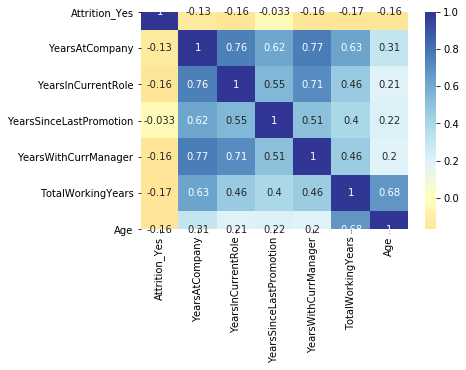

In [43]:
sns.heatmap(df_time.corr(), cmap='RdYlBu', annot=True, center=0)

,Attrition_Yes,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Age
0,1,6,4,0,5,8,41
1,0,10,7,1,7,10,49
2,1,0,0,0,0,7,37
3,0,8,7,3,0,8,33
4,0,2,2,2,2,6,27
...,...,...,...,...,...,...,...
1465,0,5,2,0,3,17,36
1466,0,7,7,1,7,9,39
1467,0,6,2,0,3,6,27
1468,0,9,6,0,8,17,49


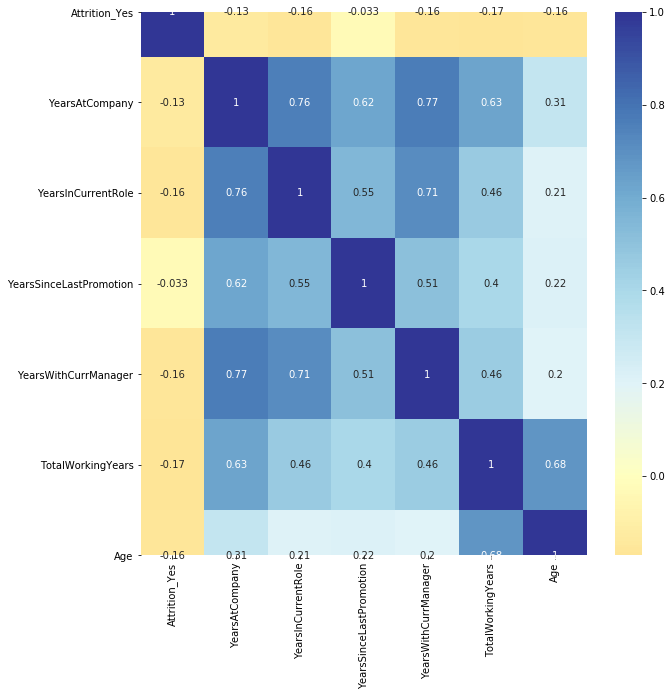

# Model

**Establish Baseline Accuracy**

In [36]:
most_common_value = len(df[df.Attrition=='No'])

total_rows = len(df)

print(most_common_value)
print(total_rows)

1233
1470


In [37]:
baseline_accuracy = most_common_value / total_rows
round(baseline_accuracy,4)

0.8388

**Initial Model Results**

I used DataRobot to generate models on the data set after the initial cleaningthe results were an accuracy score of .8963. The model is showing promise, but further exploration is needed to improve the model's performance. Note because the data set is imbalanced I am paying particular attention to the true positive rate of this and future models. The true positive rate of the initial model is .6789. 